<a href="https://colab.research.google.com/github/dkallenberg/Quarknet_Data/blob/master/Particle_Physics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Particle Physics Project**
Analyzing CMS Particle Physics Data
# New Section
Introduction
The CMS Collaboration brings together members of the particle physics community from across the globe in a quest to advance humanity’s knowledge of the very basic laws of our Universe. CMS has over 5000 particle physicists, engineers, computer scientists, technicians and students from 200 institutes and universities from more than 40 countries.
The collaboration operates and collects data from the Compact Muon Solenoid (CMS), one of the general-purpose particle detectors at CERN’s Large Hadron Collider (LHC). Collaborators from all over the world helped design and fabricate components of the detector, which were brought to CERN in Geneva, Switzerland for final assembly. Data collected by CMS are shared with several computing centers via the Worldwide LHC Computing Grid. From there, they are distributed to CMS institutions in over forty countries for physics analysis.
In keeping with CERN’s commitment to open access for high-energy physics, the scientific results from CMS are shared openly with the world. Additionally, CMS shares its particle physics data with the world. We will be analyzing some of this public data in this project.
In this particle physics project students will be doing the following:

 Determining the charge of muons deflected by a magnetic field

Writing a Matlab program to:a. histogram the "raw" data (diagnostic histograms) b. calculate the invariant mass of dimuon pairs c. Lorentz transform the data from the lab frame to the dimuon rest frame and repeat (a and b) in this frame

Discussing the results of their analyses


In [11]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
inline_rc = dict(mpl.rcParams)

In [2]:
# a hashtag tells the program "don't read the rest of the line"

lowMass = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet_Data/master/CMS_Low-Mass_DiMuon.csv')

data = lowMass


In [3]:
# The .head(n) command displays the first n rows of a file.
data.head(5)

,MuQuality,Event_Number,E1,px1,py1,pz1,Q1,E2,px2,py2,pz2,Q2
0,GT,1007912007,13.70610,4.88649,-2.50860,12.55690,1,3.67389,-0.683250,0.529614,3.56917,1
1,GT,1007957044,9.09052,-2.16135,-2.96392,-8.31686,-1,3.80945,0.787428,-0.775826,-3.64400,1
2,GG,1008000431,6.81754,5.76035,3.23987,-1.67015,1,19.14860,12.887500,12.388700,-6.86217,-1
3,GT,1008032300,31.88530,-5.85709,2.78331,-31.21880,1,4.26886,-1.501790,-0.486974,-3.96478,1
4,GT,1008075983,13.55270,1.18694,-2.35966,-13.29240,1,4.36207,1.190820,0.142888,-4.19262,1


In [4]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(2000, 12)

In [5]:
# The .types command displays
data.dtypes

MuQuality        object
Event_Number      int64
E1              float64
px1             float64
py1             float64
pz1             float64
Q1                int64
E2              float64
px2             float64
py2             float64
pz2             float64
Q2                int64
dtype: object

In [6]:
# You can specify a column by dataset.columnName (e.g., two_u.E1)
# This makes a new column called "Adam" and fills it with a meaningless 
# quantity (E1 + px1) for each event
data['Etotal'] = data.E1 + data.E2
# to raise a column to a power you need to uss **. For example to suqare the energy you would use 
data['Etotal^2'] = data.Etotal**2 

In [7]:
data.head(5)

,MuQuality,Event_Number,E1,px1,py1,pz1,Q1,E2,px2,py2,pz2,Q2,Etotal,Etotal^2
0,GT,1007912007,13.70610,4.88649,-2.50860,12.55690,1,3.67389,-0.683250,0.529614,3.56917,1,17.37999,302.064052
1,GT,1007957044,9.09052,-2.16135,-2.96392,-8.31686,-1,3.80945,0.787428,-0.775826,-3.64400,1,12.89997,166.409226
2,GG,1008000431,6.81754,5.76035,3.23987,-1.67015,1,19.14860,12.887500,12.388700,-6.86217,-1,25.96614,674.240426
3,GT,1008032300,31.88530,-5.85709,2.78331,-31.21880,1,4.26886,-1.501790,-0.486974,-3.96478,1,36.15416,1307.123285
4,GT,1008075983,13.55270,1.18694,-2.35966,-13.29240,1,4.36207,1.190820,0.142888,-4.19262,1,17.91477,320.938984


In [8]:
# calculates descriptive statistics
data['E1'].describe()

count    2000.000000
mean       10.687449
std         5.613021
min         2.731710
25%         7.304658
50%         9.254485
75%        12.286925
max        67.188800
Name: E1, dtype: float64

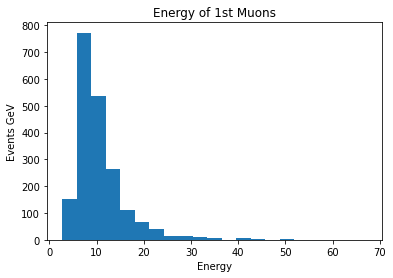

In [9]:
# This makes a histogram of that totally useless calculation above
plt.hist(data.E1, bins=21, log=False)
plt.title("Energy of 1st Muons")
plt.xlabel("Energy")
plt.ylabel("Events GeV");

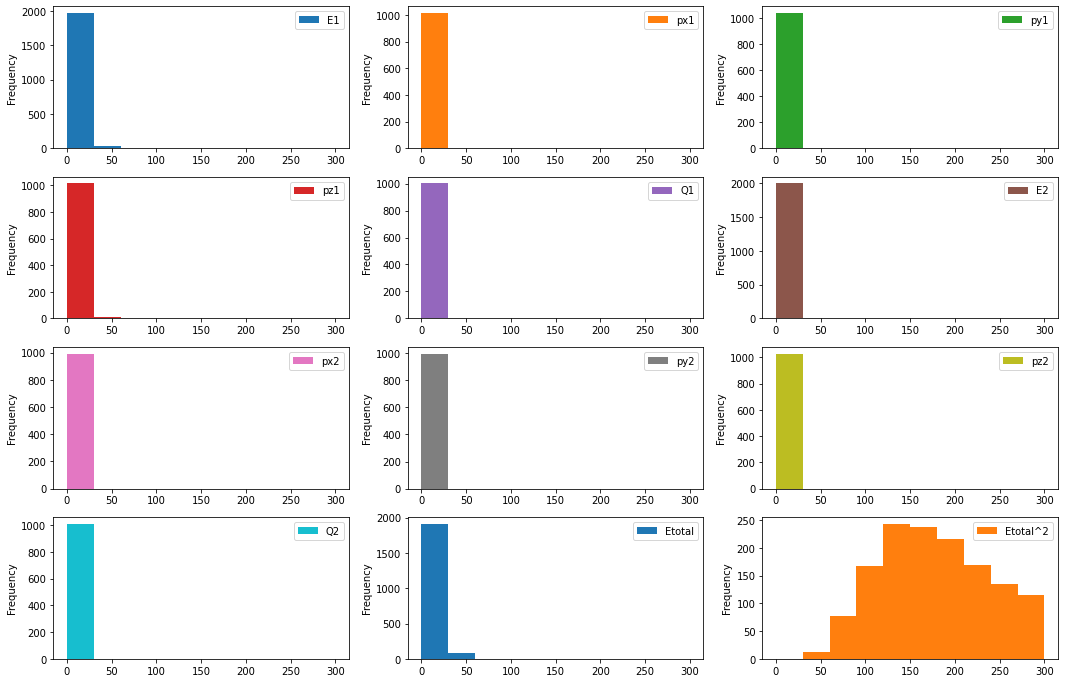

In [10]:
# Example number of variables
nvars = 12

# subplots(number of vertically stacked axis positions,
#          number of horizontally stacked axis positions,
#          figsize=(width, height))
fig, ax = plt.subplots(4, 3, figsize=(18, 12))

# Need to pass axis handle to df.plot()
data.iloc[:,-nvars:].plot.hist(subplots=True, range=[0,300], ax=ax);